Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


777/777 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 125.5432 - mean_squared_error: 125.5432 - val_loss: 2.5171 - val_mean_squared_error: 2.5171
Epoch 2/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.5329 - mean_squared_error: 1.5329 - val_loss: 1.0280 - val_mean_squared_error: 1.0280
Epoch 3/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.7204 - mean_squared_error: 0.7204 - val_loss: 0.9295 - val_mean_squared_error: 0.9295
Epoch 4/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.8614 - mean_squared_error: 0.8614 - val_loss: 1.1709 - val_mean_squared_error: 1.1709
Epoch 5/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.5491 - mean_squared_error: 1.5491 - val_loss: 0.2196 - val_mean_squared_error: 0.2196
Epoch 6/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1830 - mean_squared_error: 0.1830 - val_loss: 5.2234 - val_mean_squared_error: 5.2234
Epoch 7/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.9476 - mean_squared_error: 0.9476 - val_loss: 0.51

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


777/777 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 65.0167 - mean_squared_error: 65.0167 - val_loss: 13.3820 - val_mean_squared_error: 13.3820
Epoch 2/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.0085 - mean_squared_error: 8.0085 - val_loss: 3.8837 - val_mean_squared_error: 3.8837
Epoch 3/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6094 - mean_squared_error: 4.6094 - val_loss: 3.3644 - val_mean_squared_error: 3.3644
Epoch 4/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0173 - mean_squared_error: 1.0173 - val_loss: 3.5777 - val_mean_squared_error: 3.5777
Epoch 5/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4116 - mean_squared_error: 1.4116 - val_loss: 0.9888 - val_mean_squared_error: 0.9888
Epoch 6/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0759 - mean_squared_error: 1.0759 - val_loss: 0.9874 - val_mean_squared_error: 0.9874
Epoch 7/150
777/777 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 4.100

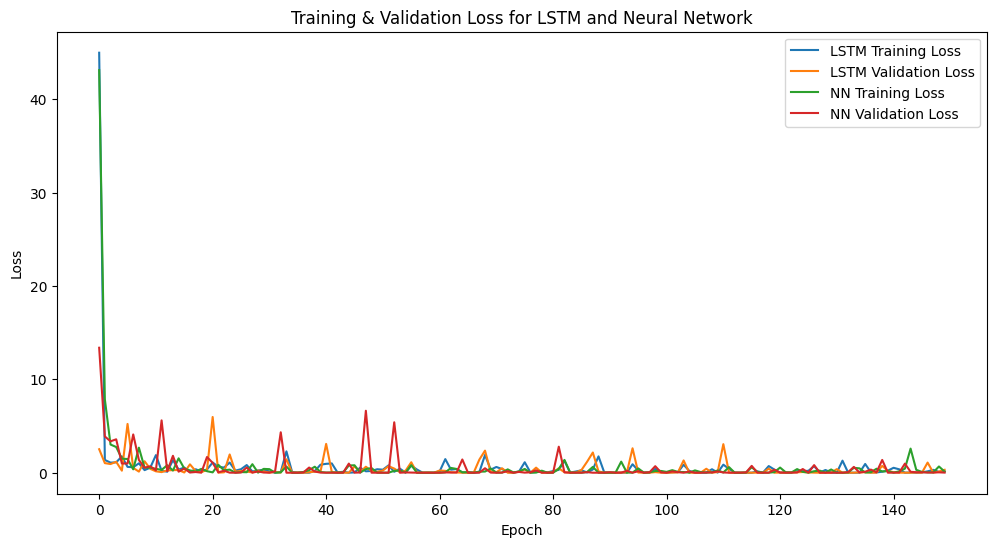

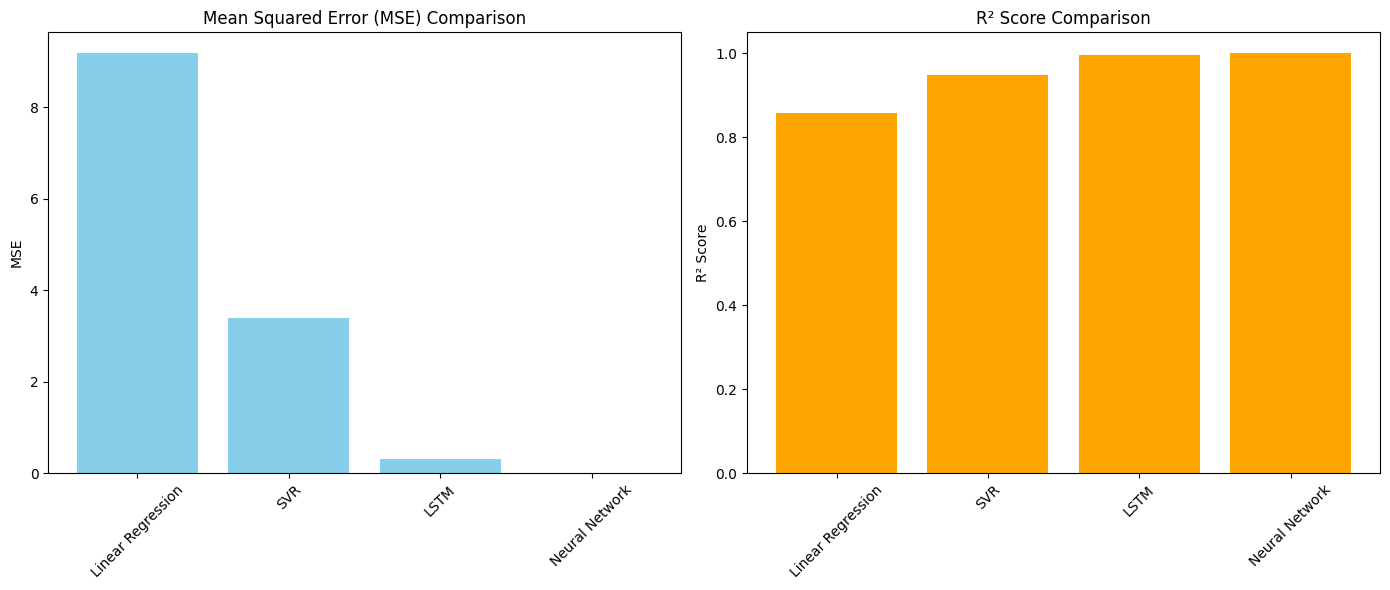

Model Performance:
Linear Regression: MSE = 9.1845, R² = 0.8585
SVR: MSE = 3.3838, R² = 0.9479
LSTM: MSE = 0.3126, R² = 0.9952
Neural Network: MSE = 0.0135, R² = 0.9998
Charging profiles saved to /content/drive/My Drive/Course Fall 24/Intro to ML/Project/Results/Linear Regression_charging_profiles.csv
Charging profiles for Linear Regression saved to /content/drive/My Drive/Course Fall 24/Intro to ML/Project/Results/Linear Regression_charging_profiles.csv
Charging profiles saved to /content/drive/My Drive/Course Fall 24/Intro to ML/Project/Results/SVR_charging_profiles.csv
Charging profiles for SVR saved to /content/drive/My Drive/Course Fall 24/Intro to ML/Project/Results/SVR_charging_profiles.csv
Charging profiles saved to /content/drive/My Drive/Course Fall 24/Intro to ML/Project/Results/LSTM_charging_profiles.csv
Charging profiles for LSTM saved to /content/drive/My Drive/Course Fall 24/Intro to ML/Project/Results/LSTM_charging_profiles.csv
Charging profiles saved to /content/drive/

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from google.colab import drive

# Load and preprocess data
def preprocess_data(trip_data):
    ev_data = trip_data[['HOUSEID', 'TRPMILES', 'ENDTIME']].copy()

    # Engineering features
    ev_data['charging_power'] = np.random.choice([3, 11], size=len(ev_data))  # kW
    ev_data['distance'] = ev_data['TRPMILES']
    ev_data['arrival_time'] = ev_data['ENDTIME']  # Use ENDTIME column as arrival time

    # Target variables
    ev_data['energy_required'] = ev_data['distance']/3 #Assuming an EV gets 3 miles per kWh
    ev_data['charging_time'] = ev_data['energy_required'] / ev_data['charging_power']
    ev_data['charge_start_time'] = ev_data['arrival_time']

    return ev_data

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
    return model

# Neural Network Model
def create_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
    return model

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    # SVR
    svr = SVR(kernel='rbf', C=100, epsilon=0.1)
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    r2_svr = r2_score(y_test, y_pred_svr)

    # LSTM
    X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    lstm = create_lstm_model((X_train.shape[1], 1))
    history_lstm = lstm.fit(
        X_train_lstm, y_train,
        validation_data=(X_test_lstm, y_test),
        epochs=150, batch_size=32, verbose=1
    )
    y_pred_lstm = lstm.predict(X_test_lstm).flatten()  # Flatten to 1D array
    mse_lstm = mean_squared_error(y_test, y_pred_lstm)
    r2_lstm = r2_score(y_test, y_pred_lstm)

    # Neural Network
    nn = create_nn_model(X_train.shape[1])
    history_nn = nn.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=150, batch_size=32, verbose=1
    )
    y_pred_nn = nn.predict(X_test).flatten()  # Flatten to 1D array
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    r2_nn = r2_score(y_test, y_pred_nn)

    # Plot Validation Loss and Accuracy for LSTM
    plt.figure(figsize=(12, 6))
    plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
    plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
    plt.plot(history_nn.history['loss'], label='NN Training Loss')
    plt.plot(history_nn.history['val_loss'], label='NN Validation Loss')
    plt.title('Training & Validation Loss for LSTM and Neural Network')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Return model results and predictions
    return {
        'Linear Regression': (mse_lr, r2_lr, y_pred_lr),
        'SVR': (mse_svr, r2_svr, y_pred_svr),
        'LSTM': (mse_lstm, r2_lstm, y_pred_lstm),
        'Neural Network': (mse_nn, r2_nn, y_pred_nn)
    }

# Generate EV charging profiles
def generate_charging_profiles(ev_data, output_file='ev_charging_profiles.csv'):
    #print("Function `generate_charging_profiles` started.")
    #print(f"Processing {len(ev_data)} rows from ev_data...")

    charging_profiles = []

    for index, row in ev_data.head(100).iterrows():
        profile = [0] * 24  # Initialize hourly profile with zeros

        # Convert HHMM to decimal hours
        raw_start_time = row['charge_start_time']  # Assuming it's in HHMM format
        start_hour = raw_start_time // 100  # Extract the hour part
        start_minute = raw_start_time % 100  # Extract the minute part
        start_time_decimal = start_hour + (start_minute / 60)  # Convert to decimal hours

        # Round up start time and charging time
        start_hour_rounded = int(np.ceil(start_time_decimal))  # Round up to the next hour
        charging_duration = int(np.ceil(row['predicted_charging_time']))  # Use predicted charging time

        # Calculate end hour
        end_hour_rounded = start_hour_rounded + charging_duration

        # Debug: Print times for verification
        #print(f"Vehicle ID: {index}, Start Hour: {start_hour_rounded}, Duration: {charging_duration}, "
              #f"End Hour: {end_hour_rounded}, Charging Power: {row['charging_power']}")

        # Assign charging power for each hour
        for hour in range(start_hour_rounded, end_hour_rounded):
            if 0 <= hour < 24:  # Ensure within valid range
                profile[hour] = row['charging_power']

        charging_profiles.append(profile)

    # Create a DataFrame for the profiles
    profile_df = pd.DataFrame(charging_profiles, columns=[f'Hour_{i}' for i in range(24)])
    profile_df.insert(0, 'Vehicle_ID', ev_data.head(100).index)  # Add Vehicle_ID as the first column

    # Save to CSV
    profile_df.to_csv(output_file, index=False)
    print(f"Charging profiles saved to {output_file}")

# Main execution
def main():
    # Mount Google Drive
    drive.mount('/content/drive')
    # Load datasets
    trip_data = pd.read_csv("/content/drive/My Drive/Course Fall 24/Intro to ML/Project/Data CSVs/tripv2pub.csv")

    # Preprocess data
    ev_data = preprocess_data(trip_data)

    # Prepare features and targets
    X = ev_data[['charging_power', 'distance']].values
    y = ev_data['charging_time'].values

    # Split data
    X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
        X, y, ev_data.index, test_size=0.2, random_state=42
    )

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate models
    results = train_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

    # **Visualize Results**
    model_names = list(results.keys())
    mse_values = [results[model][0] for model in model_names]
    r2_values = [results[model][1] for model in model_names]

    # Plot MSE Comparison
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.bar(model_names, mse_values, color='skyblue')
    plt.title('Mean Squared Error (MSE) Comparison')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)

    # Plot R² Comparison
    plt.subplot(1, 2, 2)
    plt.bar(model_names, r2_values, color='orange')
    plt.title('R² Score Comparison')
    plt.ylabel('R² Score')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print Results
    print("Model Performance:")
    for model, metrics in results.items():
        print(f"{model}: MSE = {metrics[0]:.4f}, R² = {metrics[1]:.4f}")

    # Generate charging profiles for each model's predictions
    model_predictions = {
        'Linear Regression': results['Linear Regression'][2],
        'SVR': results['SVR'][2],
        'LSTM': results['LSTM'][2],
        'Neural Network': results['Neural Network'][2]
    }

    for model_name, predictions in model_predictions.items():
        # Combine predictions with the original index
        full_predictions = pd.Series(index=ev_data.index, dtype=float)
        full_predictions.iloc[test_idx] = predictions  # Assign test predictions to test indices

        # Replace NaN values with the mean of the predictions
        full_predictions.fillna(ev_data['charging_time'].mean(), inplace=True)

        # Update ev_data with predicted charging times
        ev_data['predicted_charging_time'] = full_predictions
        output_file_path = f'/content/drive/My Drive/Course Fall 24/Intro to ML/Project/Results/{model_name}_charging_profiles.csv'
        generate_charging_profiles(ev_data, output_file=output_file_path)
        print(f"Charging profiles for {model_name} saved to {output_file_path}")


if __name__ == "__main__":
    main()

